# Envelope calculation

IMPORTANT: what matters in sound is the velocity, not the position, hence we will interpolate the velocity envelope.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pickle

import sys
sys.path.append("../")

from numerical_syllables import *
from dynamical_systems import airflow

In [2]:
def envelope_points(tsol, xsol):
    """
    Obtain the peaks (during oscillation) and the points 
    prior and after the oscillations occurs.
    """

    # Obtain peak indices
    peaks = scipy.signal.find_peaks(xsol)[0]
    
    # Obtain the peaks during oscillation
    tp = tsol[peaks]
    xp = xsol[peaks]

    # Get datapoints before and after oscillations
    tbefore = tsol[500:np.where(xsol[100:] > 0.1)[0][0]+100]
    xbefore = xsol[500:np.where(xsol[100:] > 0.1)[0][0]+100]
    
    tafter = tsol[np.where(xsol > 0.1)[0][-1]:]
    xafter = xsol[np.where(xsol > 0.1)[0][-1]:]

    # Add an datapoints before and after oscillations
    tp = np.append(tbefore, tp)
    xp = np.append(xbefore, xp)
    
    tp = np.append(tp, tafter)
    xp = np.append(xp, xafter)

    return tp, xp

# Bifurcations

In [3]:
folder = "../Output"

## Van der Pol

In [4]:
with open(f"{folder}/VdP_xsol.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]
    
vsol = np.diff(xsol)
vsol = np.append(vsol, 0)

In [5]:
dt = tsol[1] - tsol[0]

In [6]:
start = np.argmax(xsol > 0.03)
end = np.argmax(xsol[::-1] > 0.03)
window = [start-10,10-end]
xwindow = xsol[window[0]:window[1]]
twindow = tsol[window[0]:window[1]]

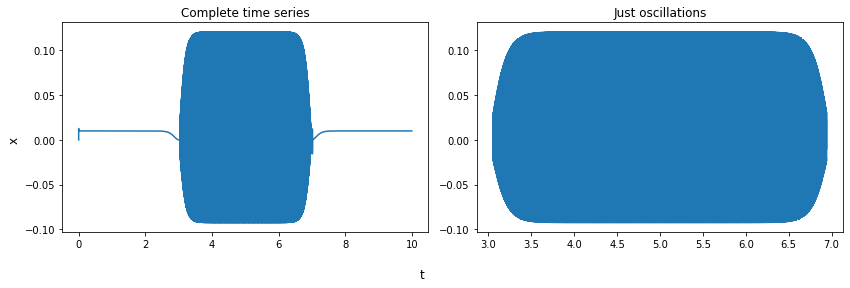

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

fig.supylabel("x")
fig.supxlabel("t")

ax[0].plot(tsol,xsol)
ax[1].plot(twindow, xwindow)

ax[0].set_title("Complete time series")
ax[1].set_title("Just oscillations")

plt.tight_layout()

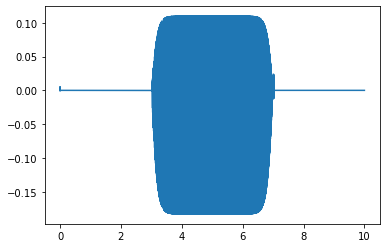

In [8]:
plt.plot(tsol, vsol)

IMPORTANT: the X range is not symmetric (lower peaks are lower than higher peaks).

### Hilbert

In [9]:
hilbert = scipy.signal.hilbert(vsol)
envelope = np.abs(hilbert)

hilbert_window = scipy.signal.hilbert(xwindow)
envelope_window = np.abs(hilbert_window)

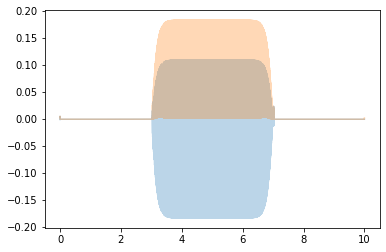

In [10]:
plt.plot(tsol, vsol, alpha=0.3)
plt.plot(tsol, envelope, alpha=0.3)

#### Curve fit

In [11]:
params = scipy.optimize.curve_fit(airflow, tsol, envelope, p0=None) #p0=initial guess
params

(array([1.7413404 , 1.74229884, 6.4622048 , 3.55893484]),
 array([[ 8.77058712e-05, -2.81786177e-05, -2.25481613e-04,
         -1.70844785e-04],
        [-2.81786177e-05,  8.72695688e-05,  1.70284296e-04,
          2.24267363e-04],
        [-2.25481613e-04,  1.70284296e-04,  7.23382040e-04,
          6.71085777e-04],
        [-1.70844785e-04,  2.24267363e-04,  6.71085777e-04,
          7.20883327e-04]]))

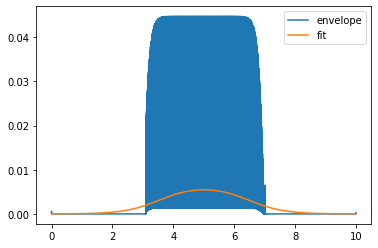

In [12]:
plt.plot(tsol, envelope, label="envelope")
plt.plot(tsol, airflow(tsol, *params[0]), label="fit")
plt.legend()

### Linear interpolation

In [11]:
#tp, xp = envelope_points(tsol, vsol)

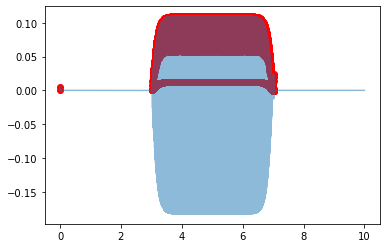

In [12]:
tp = tsol[scipy.signal.find_peaks(vsol,prominence=0.0001)[0]]
vp = vsol[scipy.signal.find_peaks(vsol,prominence=0.0001)[0]]
plt.plot(tsol, vsol, alpha=0.5)
plt.scatter(tp, vp, color="red")

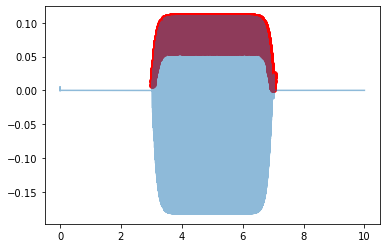

In [13]:
tpp = tp[scipy.signal.find_peaks(vp)[0]]
vpp = vp[scipy.signal.find_peaks(vp)[0]]

plt.plot(tsol, vsol, alpha=0.5)
plt.scatter(tpp, vpp, color="red")

In [14]:
# Get datapoints before and after oscillations
first_index = np.where(tsol == tpp[0])[0][0]
last_index = np.where(tsol == tpp[-1])[0][0]

# Add an datapoints before and after oscillations
tpp = np.append(tsol[:first_index], tpp)
vpp = np.append(vsol[:first_index], vpp)

tpp = np.append(tpp, tsol[last_index:])
vpp = np.append(vpp, vsol[last_index:])

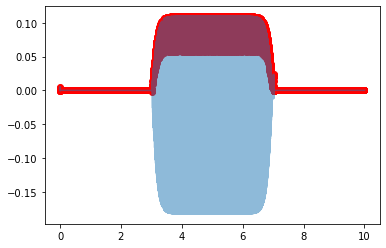

In [15]:
plt.plot(tsol, vsol, alpha=0.5)
plt.scatter(tpp, vpp, color="red")

In [16]:
x = tsol
y = np.interp(x, tpp, np.abs(vpp))

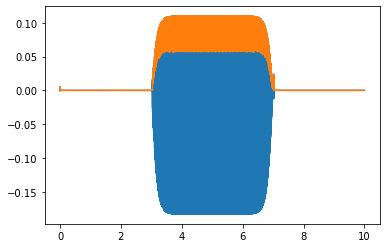

In [17]:
plt.plot(tsol, vsol)
plt.plot(x,y)

### Curve fit

In [18]:
params = scipy.optimize.curve_fit(airflow, x, y, p0=None) #p0=initial guess
params

(array([1.2176862 , 1.21799631, 5.5767667 , 4.43316679]),
 array([[ 3.24757215e-05, -3.04972464e-05, -8.33109887e-05,
         -8.18727960e-05],
        [-3.04972464e-05,  3.24782582e-05,  8.18962078e-05,
          8.32914587e-05],
        [-8.33109887e-05,  8.18962078e-05,  2.18437257e-04,
          2.17114539e-04],
        [-8.18727960e-05,  8.32914587e-05,  2.17114539e-04,
          2.18322488e-04]]))

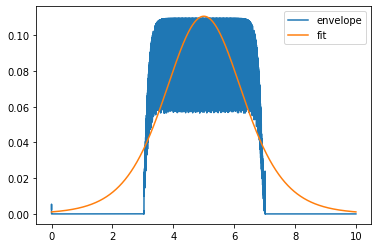

In [19]:
plt.plot(x,y, label="envelope")
plt.plot(x, airflow(x, *params[0]), label="fit")
plt.legend()

## Hopf

In [21]:
with open(f"{folder}/Hopf_xsol.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]

vsol = np.diff(xsol)
vsol = np.append(vsol, 0)

In [22]:
dt = tsol[1]-tsol[0]

In [23]:
start = np.argmax(xsol > 0.01)
end = np.argmax(xsol[::-1] > 0.01)
window = [start-10,10-end]
xwindow = xsol[window[0]:window[1]]
twindow = tsol[window[0]:window[1]]

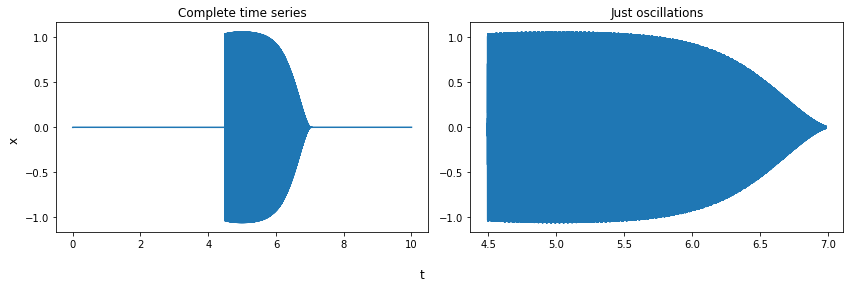

In [24]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

fig.supylabel("x")
fig.supxlabel("t")

ax[0].plot(tsol,xsol)
ax[1].plot(twindow, xwindow)

ax[0].set_title("Complete time series")
ax[1].set_title("Just oscillations")

plt.tight_layout()

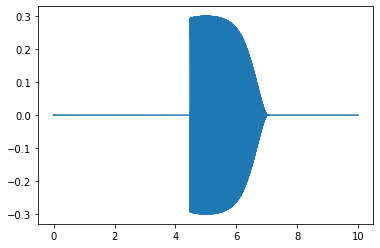

In [25]:
plt.plot(tsol, vsol)

### Hilbert

In [26]:
hilbert = scipy.signal.hilbert(xsol)
envelope = np.abs(hilbert)

hilbert_window = scipy.signal.hilbert(xwindow)
envelope_window = np.abs(hilbert_window)

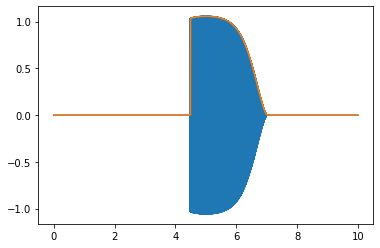

In [27]:
plt.plot(tsol, xsol)
plt.plot(tsol, envelope)

#### Curve fit

In [28]:
params = scipy.optimize.curve_fit(airflow, tsol, envelope, p0=None) #p0=initial guess
params

/home/gonzalo/Projects/SyllableBifurcations/SolutionProperties/../dynamical_systems.py:6: RuntimeWarning: overflow encountered in exp
  opening = 1/(1 + np.exp(-lambda1 * (t - T1)))


(array([4.86719447e+03, 5.47843047e+00, 4.49377783e+00, 6.52324823e+00]),
 array([[ 5.26303337e+03, -2.56629113e-06,  1.80901091e-08,
         -9.92310801e-09],
        [-2.56629113e-06,  7.50293122e-06,  1.39386960e-13,
          3.52528931e-14],
        [ 1.80901091e-08,  1.39386960e-13,  1.20920632e-11,
          5.38847267e-16],
        [-9.92310801e-09,  3.52528931e-14,  5.38847267e-16,
          1.07436443e-08]]))

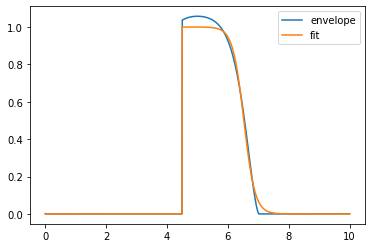

In [29]:
plt.plot(tsol, envelope, label="envelope")
plt.plot(tsol, airflow(tsol, *params[0]), label="fit")
plt.legend()

### Linear interpolation

In [30]:
tp, vp = envelope_points(tsol, vsol)

In [31]:
tp = tsol[scipy.signal.find_peaks(vsol)[0]]
vp = vsol[scipy.signal.find_peaks(vsol)[0]]

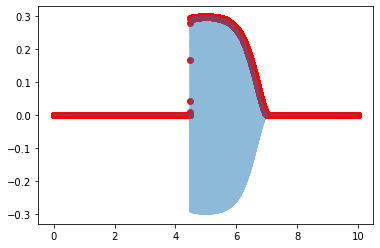

In [32]:
plt.plot(tsol, vsol, alpha=0.5)
plt.scatter(tp, vp, color="red")

In [33]:
x = tsol
y = np.interp(x, tp, np.abs(vp))

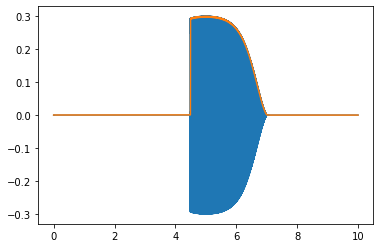

In [34]:
plt.plot(tsol, vsol)
plt.plot(x,y)

#### Curve fit

In [35]:
params = scipy.optimize.curve_fit(airflow, x, y, p0=None) #p0=initial guess
params

(array([3.70668249, 1.4020759 , 4.87840354, 5.07966703]),
 array([[ 4.68836215e-05, -8.79485961e-06, -4.72596771e-06,
         -8.57822871e-06],
        [-8.79485961e-06,  4.49731587e-06,  1.57875576e-06,
          3.31813806e-06],
        [-4.72596771e-06,  1.57875576e-06,  8.26913475e-07,
          1.41080953e-06],
        [-8.57822871e-06,  3.31813806e-06,  1.41080953e-06,
          2.93386259e-06]]))

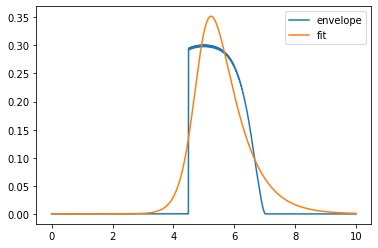

In [36]:
plt.plot(x,y, label="envelope")
plt.plot(x, airflow(x, *params[0]), label="fit")
plt.legend()

## SNILC fast

In [39]:
with open(f"{folder}/SNILC_xsol.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]
    
vsol = np.diff(xsol)
vsol = np.append(vsol, 0)

In [40]:
dt = tsol[1]-tsol[0]

In [41]:
start = np.argmax(xsol[100:] > 0.99) + 100
end = np.argmax(xsol[::-1] < -0.99)
window = [start-10,10-end]
xwindow = xsol[window[0]:window[1]]
twindow = tsol[window[0]:window[1]]

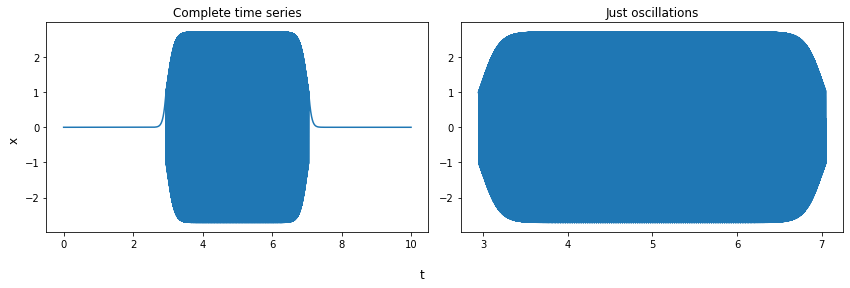

In [42]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

fig.supylabel("x")
fig.supxlabel("t")

ax[0].plot(tsol,xsol)
ax[1].plot(twindow, xwindow)

ax[0].set_title("Complete time series")
ax[1].set_title("Just oscillations")

plt.tight_layout()

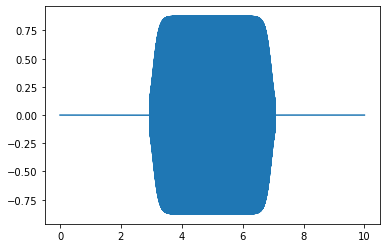

In [43]:
plt.plot(tsol,vsol)

### Hilbert

In [44]:
hilbert = scipy.signal.hilbert(xsol)
envelope = np.abs(hilbert)

hilbert_window = scipy.signal.hilbert(xwindow)
envelope_window = np.abs(hilbert_window)

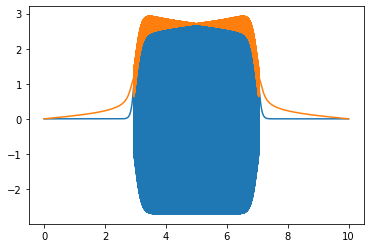

In [45]:
plt.plot(tsol, xsol)
plt.plot(tsol, envelope)

#### Curve fit

In [46]:
params = scipy.optimize.curve_fit(airflow, tsol, envelope, p0=None) #p0=initial guess
params

/home/gonzalo/.local/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(array([  63.47163087,  -59.47064412, -129.51753102, -131.6488052 ]),
 array([[inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf]]))

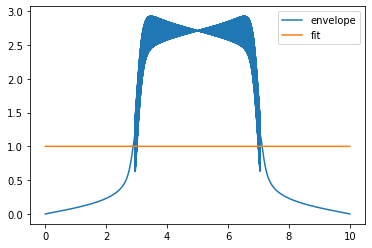

In [47]:
plt.plot(tsol, envelope, label="envelope")
plt.plot(tsol, airflow(tsol, *params[0]), label="fit")
plt.legend()

### Linear interpolation

In [48]:
tp, vp = envelope_points(tsol, vsol)

In [49]:
tp = tsol[scipy.signal.find_peaks(vsol)[0]]
vp = vsol[scipy.signal.find_peaks(vsol)[0]]

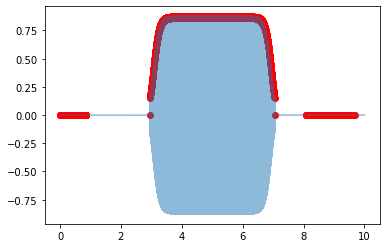

In [50]:
plt.plot(tsol, vsol, alpha=0.5)
plt.scatter(tp, vp, color="red")

In [51]:
envelope = np.interp(tsol, tp, np.abs(vp))

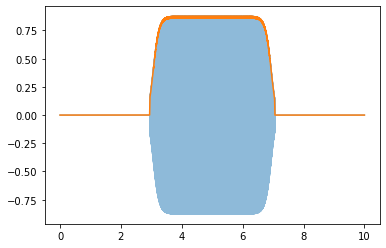

In [52]:
plt.plot(tsol, vsol, alpha=0.5)
plt.plot(tsol,envelope)

### Curve fit

In [55]:
params = scipy.optimize.curve_fit(airflow, x, y, p0=None) #p0=initial guess
params

(array([3.70668249, 1.4020759 , 4.87840354, 5.07966703]),
 array([[ 4.68836215e-05, -8.79485961e-06, -4.72596771e-06,
         -8.57822871e-06],
        [-8.79485961e-06,  4.49731587e-06,  1.57875576e-06,
          3.31813806e-06],
        [-4.72596771e-06,  1.57875576e-06,  8.26913475e-07,
          1.41080953e-06],
        [-8.57822871e-06,  3.31813806e-06,  1.41080953e-06,
          2.93386259e-06]]))

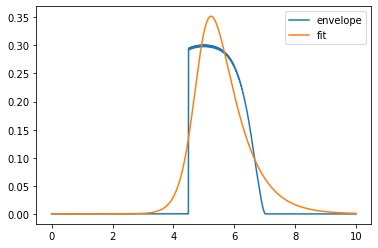

In [56]:
plt.plot(x,y, label="envelope")
plt.plot(x, airflow(x, *params[0]), label="fit")
plt.legend()